Machine Learning (IE406)\
Assignment 2\
Lukhi Krunalkumar - 201901449

In [ ]:
import numpy as np
import sys
import warnings
import math
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def f1(x):
  return x[0]**2 + (x[1])**2 + 5
  

def f2(x):
  return (x[0])**2 + (x[1])**2 - 6*(x[0]) + 8*(x[1]) + 9
  

def f3(x):
  return 3*(x[0]**2) - 6*(x[1]**2)
  

In [ ]:
def g1(x):
  return [2*x[0], 2*x[1]]

def g2(x):
  return [2*x[0]-6, 2*x[1]+8]

def g3(x):
  return [6*x[0], -12*x[1]]

In [ ]:
x1 = np.linspace(-10, 10, 21)
y1 = np.linspace(-10, 10, 21)
x2 = np.linspace(-20, 20, 41)
y2 = np.linspace(-20, 20, 41)
x3 = np.linspace(-10, 10, 21)
y3 = np.linspace(-10, 10, 21)

X1, Y1 = np.meshgrid(x1, y1)
X2, Y2 = np.meshgrid(x2, y2)
X3, Y3 = np.meshgrid(x3, y3)
Z1 = f1([X1, Y1])
Z2 = f2([X2 ,Y2])
Z3 = f3([X3, Y3])


In [ ]:

def gradient_Descent(f,g, cur, alpha, eps, max_itr,eq):

  warnings.filterwarnings("ignore")
  initial=np.array(cur)
  flag=0
  cur_dif=1
  f_cur=f(cur)
  itr=0
  x=[];
  y=[];

  while cur_dif > eps and itr < max_itr:
    x.append(itr)
    y.append(f_cur)

    prev=cur;

    grad = g(prev)
    
    cur = prev-alpha*np.array(grad)
    
    f_prev = f_cur

    if np.dot(np.array(g(cur)),np.array(grad))<0:
     flag=2
     break;
    try:
      f_cur=f(cur)
    except:
      flag=1
      return
    

    cur_dif=abs(f_cur-f_prev)
   
    itr = itr + 1

  plt.figure()
  plt.plot(x,y)
  plt.xlabel("Number of Iterations")
  plt.ylabel("f")
  plt.title(f"{eq}, \u03B1={alpha}, intial guess=({initial[0]},{initial[1]})")
  plt.show()
  angle1 = math.atan2(grad[1],grad[0])
  grad_cur = g(cur)
  angle2= math.atan2(grad_cur[1],grad_cur[0])

  if math.isinf(f_cur) or flag==1 :
    print("\nNo local minima\n")
    return
  if flag==2:
    print("\nBad choice of learning rate\n")
    return
  print("\nlacal minima found at",tuple(cur),"with minimum value of the function = ",f_cur,"\n")
  
  

algorithm gets terminated when predicted minima bypass the actual local minima. It is the case when learning rate is high. So, function vs iteration graph is empty in this case. 


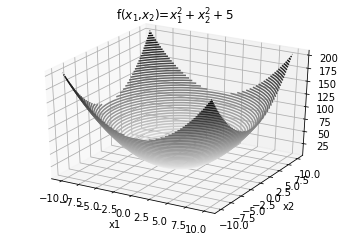

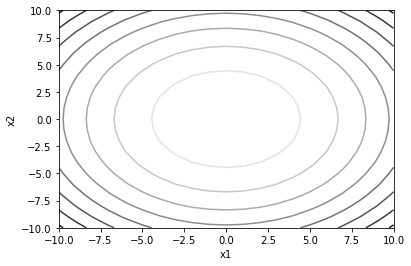

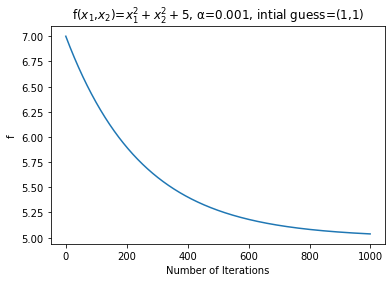


lacal minima found at (0.13506452244668363, 0.13506452244668363) with minimum value of the function =  5.0364848504475015 



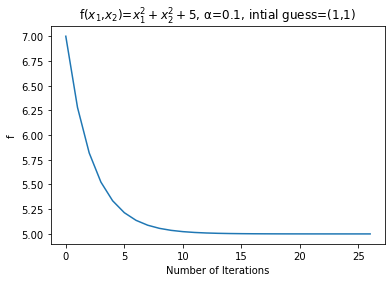


lacal minima found at (0.002417851639229259, 0.002417851639229259) with minimum value of the function =  5.000011692013099 



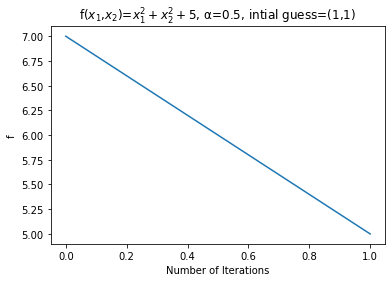


lacal minima found at (0.0, 0.0) with minimum value of the function =  5.0 



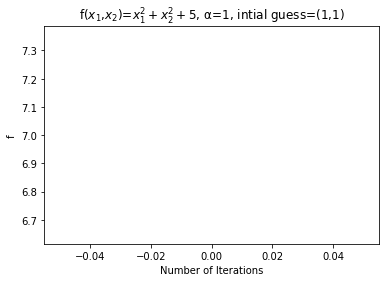


Bad choice of learning rate



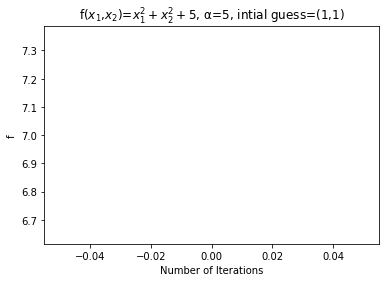


Bad choice of learning rate



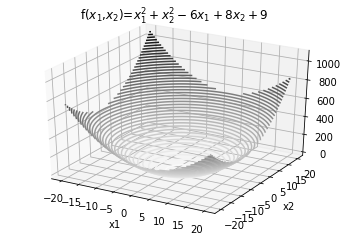

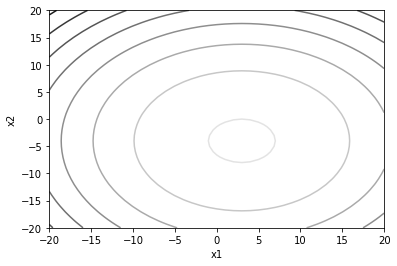

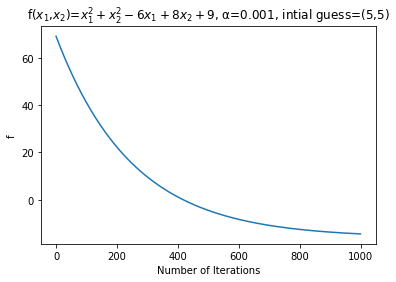


lacal minima found at (3.2701290448933715, -2.784419297979848) with minimum value of the function =  -14.449393855981189 



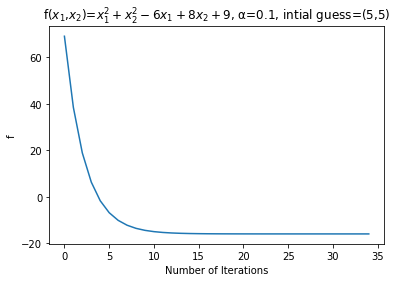


lacal minima found at (3.0008112963841462, -3.996349166271343) with minimum value of the function =  -15.999986013211263 



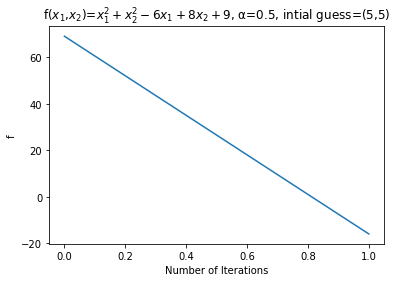


lacal minima found at (3.0, -4.0) with minimum value of the function =  -16.0 



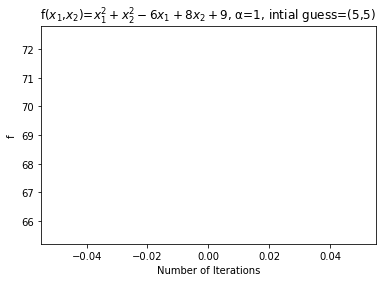


Bad choice of learning rate



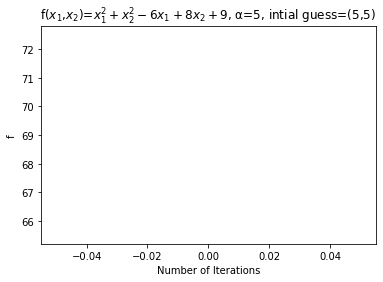


Bad choice of learning rate



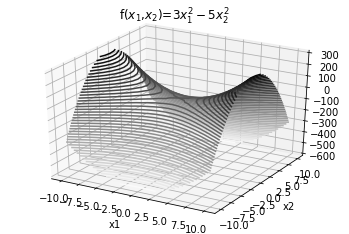

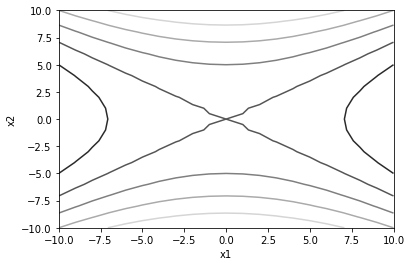

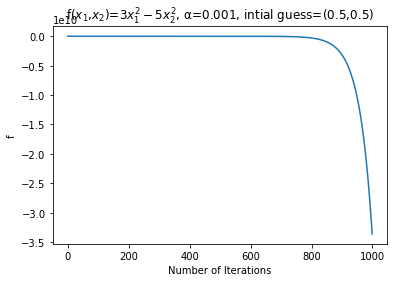


lacal minima found at (0.0012171788620674172, 75767.42157474221) with minimum value of the function =  -34444213032.50826 



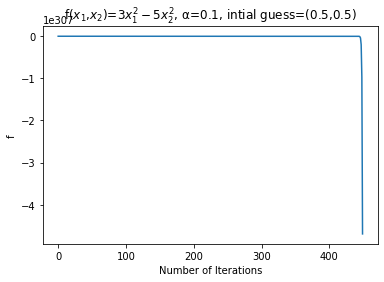


No local minima



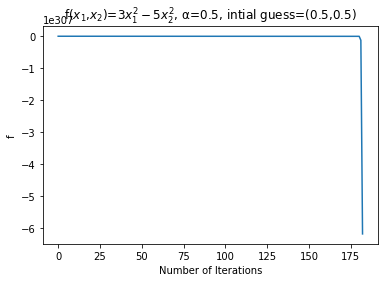


No local minima



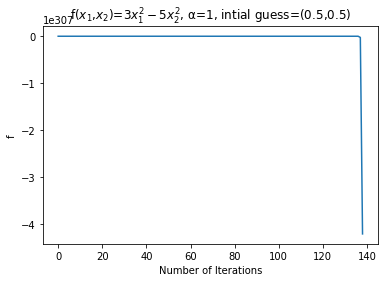


No local minima



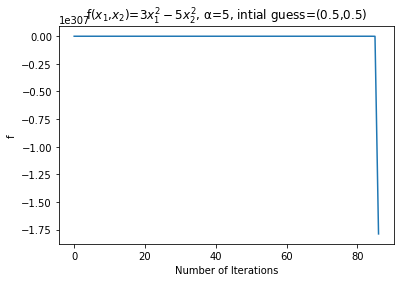


No local minima



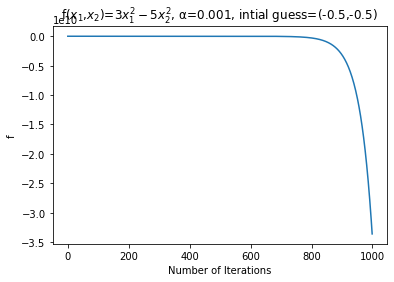


lacal minima found at (-0.0012171788620674172, -75767.42157474221) with minimum value of the function =  -34444213032.50826 



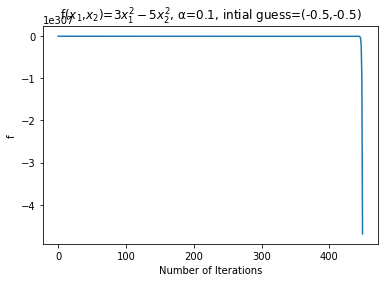


No local minima



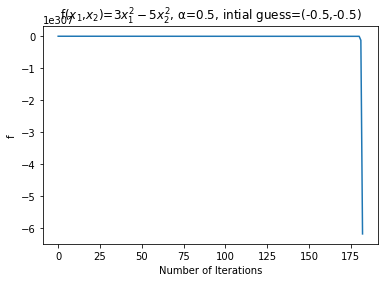


No local minima



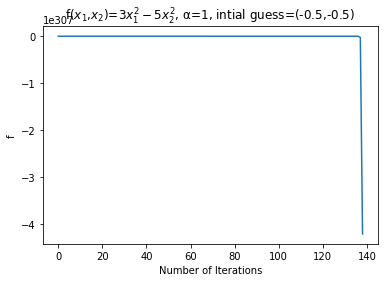


No local minima



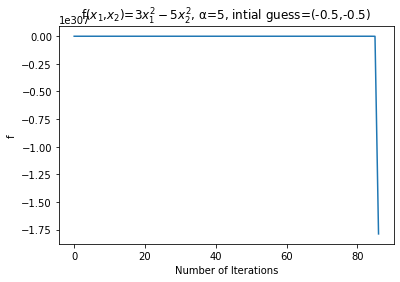


No local minima



In [ ]:
init = [[1, 1], [5, 5], [0.5, 0.5],[-0.5,-0.5]]
alpha = [0.001, 0.1, 0.5, 1, 5]
pvar=[[X1,Y1,Z1],[X2,Y2,Z2],[X3,Y3,Z3]]
eps = 1e-5
max_itr = 1000
eq=["f($x_1$,$x_2$)=$x_1^2+x_2^2+5$","f($x_1$,$x_2$)=$x_1^2+x_2^2-6x_1+8x_2+9$","f($x_1$,$x_2$)=$3x_1^2-5x_2^2$","f($x_1$,$x_2$)=$3x_1^2-5x_2^2$"]
fun=[f1,f2,f3,f3]
grad=[g1,g2,g3,g3]

for i in range(4):

  if(i<3):
    plt.figure()
    ax1 = plt.axes(projection = '3d')
    ax1.contour3D(pvar[i][0],pvar[i][1] , pvar[i][2], 50, cmap='binary')
    plt.title(f"{eq[i]}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    plt.figure()
    plt.contour(pvar[i][0],pvar[i][1] , pvar[i][2],cmap="binary")
    plt.xlabel("x1")
    plt.ylabel("x2")
  
  for a in alpha:
    gradient_Descent(fun[i],grad[i],init[i],a,eps,max_itr,eq[i])

      

when learning rate is small, we get more accurate results. Also, there is range of values of learning rate for which error in calculation of minima is negligible. Outside this range, error is quit high.

In [ ]:
H1 = np.array([[2,0],[0,2]])
val1, vec1 = np.linalg.eig(H1)
H2 = np.array([[2,0],[0,2]])
val2, vec2 = np.linalg.eig(H2)
H3 = np.array([[6,0],[0,-10]])
val3, vec3=np.linalg.eig(H3)

compare1 = val1 >= 0
compare2 = val2 >= 0
compare3 = val3 >= 0

if(compare1.all()):
  print("function 1 is convex\n")
else:
  print("function 1 is not covex\n")

if(compare2.all()):
  print("function 2 is convex\n")
else:
  print("function 2 is not covex\n")

if(compare3.all()):
  print("function 3 is convex\n")
else:
  print("function 3 is not covex\n")



function 1 is convex

function 2 is convex

function 3 is not covex



As third function is convex, we could not find minima using gradient descent algorithm. 